# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [1]:
import pandas as pd
import numpy as np

# Question 1.1
dataq1p1 = pd.read_csv("./data/airbnb_hw.csv")
print(dataq1p1["Price"].head())

dataq1p1["Clean_Price"] = (dataq1p1["Price"].str.replace(',', '', regex=False).astype(float))

price_missing = dataq1p1["Clean_Price"].isna().sum()
print(price_missing)

0    145
1     37
2     28
3    199
4    549
Name: Price, dtype: object
0


Q1.1

When cleaning the "Price" variable, I removed all of the commas and casted all of the values to floats to ensure consistency throughout the column. I decided not to remove and dollar signs ($) from this column because the values did not appear to include them when I looked at the first 5 rows. After cleaning this variable, I ended up with 0 missing values.

In [2]:
# Question 1.2
dataq1p2 = pd.read_csv("./data/mn_police_use_of_force.csv")
print(dataq1p2["subject_injury"].unique())

dataq1p2["clean_subject_injury"] = (dataq1p2["subject_injury"].
                              str.strip().
                              str.lower().
                              replace({"yes":"Yes", "no":"No"}))

missing_subject_inquiry = dataq1p2["clean_subject_injury"].isna().mean()
print(missing_subject_inquiry)

q1p2_crosstab = pd.crosstab(dataq1p2["force_type"], dataq1p2["clean_subject_injury"].fillna("None"), dropna=False)
print(q1p2_crosstab)

[nan 'No' 'Yes']
0.7619342359767892
clean_subject_injury           No  None   Yes
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  7051  1286
Chemical Irritant             131  1421    41
Firearm                         2     0     0
Gun Point Display              33    27    44
Improvised Weapon              34    74    40
Less Lethal                     0    87     0
Less Lethal Projectile          1     0     2
Maximal Restraint Technique     0   170     0
Police K9 Bite                  2    31    44
Taser                         150   985   172


Q1.2

The proportion of values that are missing is 0.7619. This is a concern because this a large majority of the dataset. Data for subject injury tends to be missing for observations that include bodily force, chemical irritant, and taser as the type of force used. 

In [3]:
# Question 1.3
dataq1p3 = pd.read_parquet("./data/justice_data.parquet")
dataq1p3["Clean_WhetherDefendantWasReleasedPretrial"] = (dataq1p3["WhetherDefendantWasReleasedPretrial"].replace(9.0, np.nan))

# Question 1.4
print(dataq1p3["SentenceTypeAllChargesAtConvictionInContactEvent"].unique())
dataq1p3["Clean_ImposedSentence"] = pd.to_numeric(dataq1p3["ImposedSentenceAllChargeInContactEvent"], errors="coerce")
dataq1p3.loc[
    dataq1p3["SentenceTypeAllChargesAtConvictionInContactEvent"] == 0 & 
    dataq1p3["Clean_ImposedSentence"].isna(), 
    "Clean_ImposedSentence"
] = 0

[9 0 1 4 2]


Q1.3

Completed in code chunk above

Q1.4

When cleaning the "ImposedSentenceAllChargeInContactEvent" variable, I looked at the "SentenceTypeAllChargesAtConvictionInContact" variable to see if the sentence type was type 0 (Probation/no incarceration). If this was the sentence type, then that means there would be no imposed sentence (therefore the missing value makes sense). In these cases, I changed the missing value to be equal to 0 since there was no time served.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [4]:
# Question 2.1
import pandas as pd
import matplotlib.pyplot as plt

messy_dataq2 = pd.read_excel("GSAF5.xls")
print(messy_dataq2.head())

# Question 2.2
dataq2 = messy_dataq2.dropna(axis=1, how="all")

               Date    Year        Type      Country  \
0  16th August 2025  2025.0    Provoked          USA   
1       18th August  2025.0  Unprovoked    Australia   
2       17th August  2025.0  Unprovoked      Bahamas   
3        7th August  2025.0  Unprovoked    Australia   
4        1st August  2025.0  Unprovoked  Puerto Rico   

                               State                             Location  \
0                            Florida               Cayo Costa Boca Grande   
1                                NSW                       Cabarita Beach   
2  Atlantic Ocean near Big Grand Cay  North of Grand Bahama near Freeport   
3                                NSW                        Tathra Beach    
4                           Carolina                       Carolina Beach   

       Activity          Name Sex Age  ...                 Species   \
0       Fishing   Shawn Meuse   M   ?  ...  Lemon shark 1.8 m (6ft)   
1       Surfing     Brad Ross   M   ?  ...  5m (16.5ft) Gr

Q2.1

Completed in code chunk above

Q2.2

Completed in code chunk above

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

<Axes: xlabel='Clean_Year'>

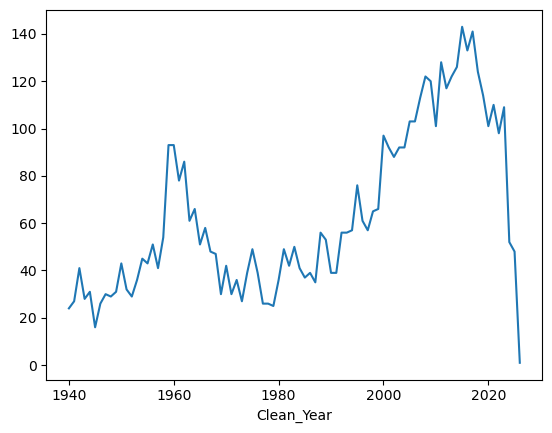

In [5]:
# Question 2.3
dataq2["Clean_Year"] = pd.to_numeric(dataq2["Year"], errors="coerce")
print(dataq2["Clean_Year"].unique())
drop_na_dataq2p3 = dataq2.dropna(subset=["Clean_Year"]) # drop the NAs
filtered = drop_na_dataq2p3[drop_na_dataq2p3["Clean_Year"] >= 1940] # filter to the correct years

num_attacks = filtered.groupby("Clean_Year").size()
print(num_attacks)
num_attacks.plot(kind="line")


Q2.3

The number of shark attacks is generally increasing from 1950-1960 and from 1980-2018. There are periods where the number of shark attacks decreased as well, such as in the 1960s and the 2020s. The range of years in this dataset appears to span from the early 1000s to present time. 

['?' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' 35 58 29 24 20 55 17
 12 37 36 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30 15 41 14 43 26
 'Middle age' 18 21 49 25 46 19 65 64 '13' nan '11' '46' '32' '10' '64'
 '62' '22' '15' '52' '44' '47' '55' '59' '8' '50' '34' '38' '30s' '20/30'
 '35' '65' '20s' '77' '60' '49' '!2' '24' '73' '25' '50s' '58' '67' '17'
 '6' '41' '53' '68' '43' '51' '31' 39 51 10 13 60 '40s' 62 'teen' 8 22 32
 56 'Teen' 42 50 'M' 9 31 11 34 '!6' '!!' 47 7 71 59 53 54 75 '45 and 15'
 73 52 70 4 63 44 '28 & 22' '22, 57, 31' '60s' "20's" 67 74 '9 & 60'
 'a minor' 6 3 82 '40?' 66 72 '23' '36' '71' '48' '70' '18 months' '57'
 '28' '33' '61' '74' '27' '3' '28 & 26' '5' '54' '86' '18 or 20'
 '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84
 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5
 ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18' '8

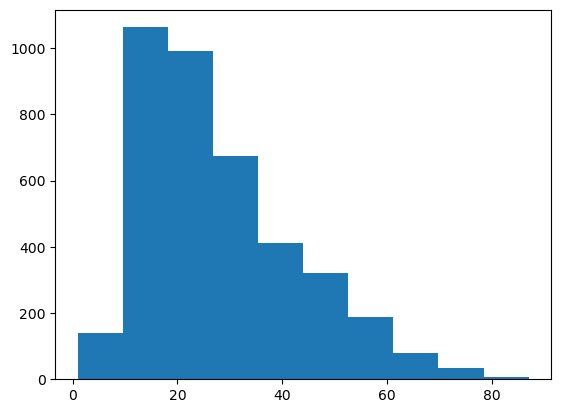

0.8026128940641863


In [6]:
# Question 2.4
print(dataq2["Age"].unique())
dataq2["Strip_Age"] = dataq2["Age"].astype(str).str.strip() # get rid of white space

def clean_age_variable(val):
    if pd.isna(val):
        return None
    
    numbers = ["0", "1", "2", "3", "4", "5" , "6", "7", "8", "9"]
    if not any(character.isdigit() for character in val): # remove all non-numeric values
        return None
    
    characters = "!", "!!", "?", "xa", "-", "or", "&", ">", "+", "s", "/", "and", ","
    if any(x in val for x in characters): # remove additional values with non-numeric values
        return None
    
    fraction = "½"
    if fraction in val:
        val.replace("½", ".5")
        
    try:
        return float(val)
    except:
        return None
        
dataq2["Clean_Age"] = dataq2["Strip_Age"].apply(clean_age_variable)

q2_ages = dataq2["Clean_Age"].dropna()

plt.hist(q2_ages)
plt.show()


# Question 2.5
dataq2["Sex"] = dataq2["Sex"].str.strip().str.upper()
proportion_male = (dataq2["Sex"] == "M").mean()
print(proportion_male)



Q2.4

Completed in the code chunk above.

Q2.5

The proportion of victims that are male is 0.8026.


In [7]:
# Question 2.6
print(dataq2["Type"].unique())

def clean_type_variable(val):
    val = str(val).strip().lower()
    if val == "provoked":
        return "Provoked"
    elif val == "unprovoked":
        return "Unprovoked"
    else:
        return "Unknown"
    
dataq2["Clean_Type"] = dataq2["Type"].apply(clean_type_variable)

attack_total = len(dataq2)
unprovoked_total = (dataq2["Clean_Type"] == "Unprovoked").sum()
q6p6_proportion = unprovoked_total/attack_total
print(q6p6_proportion)

# Question 2.7
dataq2["Fatal Y/N"].unique()
dataq2["Clean_Fatal"] = dataq2["Fatal Y/N"].str.strip().str.upper()

def clean_fatal_variable(val):
    if val == "Y":
        return "Y"
    elif val == "N":
        return "N"
    else:
        return "Unknown"
    
dataq2["Clean_Fatal"] = dataq2["Clean_Fatal"].apply(clean_fatal_variable)

['Provoked' 'Unprovoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat']
0.7380005680204488


Q2.6

The proportion of attacks that are unprovoked is 0.738.

Q2.7

Completed in code chunk above

In [8]:
# Question 2.8
unprovoked_attacks = dataq2[dataq2["Type"] == "Unprovoked"]
sex_unprovoked_attacks = unprovoked_attacks["Sex"].value_counts()
print(sex_unprovoked_attacks)
print("\n")

type_fatality = dataq2.groupby('Type')["Clean_Fatal"].value_counts().unstack()
print(type_fatality)
print("\n")

fatality_sex = dataq2.groupby("Clean_Fatal")["Sex"].value_counts().unstack()
print(fatality_sex)

M      4344
F       683
LLI       1
Name: Sex, dtype: int64


Clean_Fatal               N  Unknown       Y
Type                                        
 Provoked               1.0      NaN     1.0
?                       1.0      NaN     NaN
Boat                    7.0      NaN     NaN
Invalid                17.0    527.0     8.0
Provoked              610.0      9.0    20.0
Questionable           14.0      4.0     8.0
Sea Disaster           67.0      6.0   169.0
Unconfirmed             NaN      1.0     NaN
Under investigation     1.0      NaN     NaN
Unprovoked           3856.0     79.0  1261.0
Unverified              1.0      NaN     NaN
Watercraft            332.0     12.0    11.0
unprovoked              1.0      NaN     NaN


Sex            .      F  LLI       M  M X 2    N
Clean_Fatal                                     
N            NaN  614.0  1.0  3941.0    NaN  1.0
Unknown      NaN   70.0  NaN   460.0    1.0  NaN
Y            1.0  122.0  NaN  1251.0    NaN  1.0


Q2.8

Sharks are more likely to launch unprovoked attacks on men. The attack is more likely to be fatal when the attack is unprovoked. Also, the attack is more likely to be fatal when the victim is male. I think sharks are interesting to look at, but I would be scared if I were ever swimming in the ocean near them. 

In [9]:
# Question 2.9
dataq2["Species "] = dataq2["Species "].astype(str)
num_white_shark_attacks = dataq2["Species "].str.contains("White", case=False, na=False)
q2p9_proportion = num_white_shark_attacks.mean()
print(q2p9_proportion)

0.10678784436239705


Q2.9

The proportion of attacks that appear to be by white sharks is 0.107.